# Load & Analyze the Dataset

The dataset is available on [Mendeley](https://data.mendeley.com/datasets/p5w98dvbbk/1) and the article is published at [Elseiver.](https://doi.org/10.1016/j.dib.2025.111363)


We have analyzed the dataset and tried to find out the relationship between columns with the help of statistics analysis. Not only that, we have developed models which can classify the risk levels. The model used in our research are Random Forest, Support Vector Machine, XGBoost, Logistic Regression and K nearest neighbours.

In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

In [ ]:
!gdown --id 1HeDhlMA07eoqHIVbcfFLXIznJejfMUg9

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1HeDhlMA07eoqHIVbcfFLXIznJejfMUg9

but Gdown can't. Please check connections and permissions.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the dataset**

In [ ]:
data = pd.read_csv('/content/Dataset - Updated.csv')

In [ ]:
data.head()

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate,Risk Level
0,22,90.0,60.0,9.0,100,18.0,1.0,1.0,0,1,80.0,High
1,22,110.0,70.0,7.1,98,20.4,0.0,0.0,0,0,74.0,Low
2,27,110.0,70.0,7.5,98,23.0,1.0,0.0,0,0,72.0,Low
3,20,100.0,70.0,7.2,98,21.2,0.0,0.0,0,0,74.0,Low
4,20,90.0,60.0,7.5,98,19.7,0.0,0.0,0,0,74.0,Low


In [ ]:
data.info() #all information about the datset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     1205 non-null   int64  
 1   Systolic BP             1200 non-null   float64
 2   Diastolic               1201 non-null   float64
 3   BS                      1203 non-null   float64
 4   Body Temp               1205 non-null   int64  
 5   BMI                     1187 non-null   float64
 6   Previous Complications  1203 non-null   float64
 7   Preexisting Diabetes    1203 non-null   float64
 8   Gestational Diabetes    1205 non-null   int64  
 9   Mental Health           1205 non-null   int64  
 10  Heart Rate              1203 non-null   float64
 11  Risk Level              1187 non-null   object 
dtypes: float64(7), int64(4), object(1)
memory usage: 113.1+ KB


# Data Preprocessing

**Identify columns with missing values**

In [ ]:
missing_cols =data.columns[data.isnull().any()]

for col in missing_cols:
  if data[col].dtype in ['int64',"float64"]:
    data[col].fillna(data[col].mean(), inplace=True)
  else:
    data[col].fillna(data[col].mode()[0], inplace=True)


/tmp/ipython-input-3460220814.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
/tmp/ipython-input-3460220814.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

## Hypothesis

###**Z-test**

**HYPOTHESIS 1.**

**Null Hypothesis** H$_0$:mean value of BMI is 22.

 **Alternative Hypothesis** H$_1$:mean value of BMI is not 22

In [ ]:
from statsmodels.stats import weightstats as stests
z_stat, p_val = stests.ztest(data['BMI'], value=22)
if p_val < 0.05:
    print("The mean value of BMI is significantly different from 22.")
else:
    print("The mean value of BMI is not significantly different from 22.")

The mean value of BMI is significantly different from 22.


###**Independent T-test**

**HYPOTHESIS 2.**

**Null Hypothesis** H$_0$:there is no significant difference in BmI of high risk patients and low risk patiens.

**Alternative Hypothesis** H$_1$:there is a significant difference in BmI of high risk patients and low risk patiens

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
high_risk_bmi = data[data['Risk Level'] == 'High']['BMI']
low_risk_bmi = data[data['Risk Level'] == 'Low']['BMI']

t_stat, p_val = ttest_ind(high_risk_bmi, low_risk_bmi, equal_var=False)
print("BMI vs. Risk Level t-test:")
print("t-statistic =", t_stat)
print("p-value =", p_val)
if p_val < 0.05:
    print("There is a significant difference in BMI between high and low risk patients.")
else:
    print("There is no significant difference in BMI between high and low risk patients.")

BMI vs. Risk Level t-test:
t-statistic = 18.479393866515885
p-value = 3.4001318928958965e-61
There is a significant difference in BMI between high and low risk patients.


**HYPOTHESIS 3.**

**Null Hypothesis** H$_0$: Heart rate does not significantly differ between patients with and without preexisting diabetes.

**Alternative Hypothesis** H$_0$: Heart rate significantly differs between patients with and without preexisting diabetes.

In [ ]:
prediabetic=data[data['Preexisting Diabetes']=='Yes']
not_prediabetic=data[data['Preexisting Diabetes']=='No']

t_stat, p_val = ttest_ind(prediabetic['Heart Rate'], not_prediabetic['Heart Rate'], equal_var=False)
print("Heart Rate vs. Preexisting Diabetes t-test:")
print("t-statistic =", t_stat)
print("p-value =", p_val)
if p_val < 0.05:
    print("There is a significant difference in Heart Rate between patients with and without preexisting diabetes.")
else:
    print("There is no significant difference in Heart Rate between patients with and without preexisting diabetes.")

Heart Rate vs. Preexisting Diabetes t-test:
t-statistic = nan
p-value = nan
There is no significant difference in Heart Rate between patients with and without preexisting diabetes.


/usr/local/lib/python3.12/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


###**Chi Square Test**

In [ ]:
import scipy.stats as stats #Loading Libraries

**HYPOTHESIS 4.**

**Null Hypothesis** H$_0$:Gestational diabetes is independent of the patient's risk level.

**Alternative Hypothesis** H$_1$:Gestational diabetes is dependent of the patient's risk level.


In [ ]:
import scipy.stats as stats

contingency_table = pd.crosstab(data['Gestational Diabetes'], data['Risk Level'])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("\nGestational Diabetes vs. Risk Level Chi-square test:")
print("Chi-square =", chi2)
print("p-value =", p)
if p < 0.05:
    print("There is a significant association between Gestational Diabetes and Risk Level.")
else:
    print("There is no significant association between Gestational Diabetes and Risk Level.")



Gestational Diabetes vs. Risk Level Chi-square test:
Chi-square = 234.04550297014177
p-value = 7.818411073573493e-53
There is a significant association between Gestational Diabetes and Risk Level.


**HYPOTHESIS 5.**

**Null Hypothesis** H$_0$:Mental Health is independent of the patient's risk level.

**Alternative Hypothesis** H$_1$:Mental Health is dependent of the patient's risk level.

In [ ]:
import scipy.stats as stats

contingency_table = pd.crosstab(data['Mental Health'], data['Risk Level'])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("\nMental Health vs. Risk Level Chi-square test:")
print("Chi-square =", chi2)
print("p-value =", p)
if p < 0.05:
    print("There is a significant association between Mental Health and Risk Level.")
else:
    print("There is no significant association between Mental Health and Risk Level.")


Mental Health vs. Risk Level Chi-square test:
Chi-square = 478.34428186873185
p-value = 4.898076008544096e-106
There is a significant association between Mental Health and Risk Level.



###**One Way Anova**

In [ ]:
from scipy.stats import f_oneway #Loading Libraries

**HYPOTHESIS 6.**

**Null Hypothesis** H$_0$:There is a significant difference in BMI between the three risk levels.

**Alternative Hypothesis** H$_1$:There is no significant difference in BMI between the three risk levels


In [ ]:

risks=[data[data['Risk Level']==risk]['BMI'] for risk in data['Risk Level'].unique  ()]
f_stat, p_val = f_oneway(*risks)
print("BMI vs. Risk Level ANOVA:")
print("F-statistic =", f_stat)
print("p-value =", p_val)
if p_val < 0.05:
    print("There is a significant difference in BMI between the three risk levels.")
else:
    print("There is no significant difference in BMI between the three risk levels.")

BMI vs. Risk Level ANOVA:
F-statistic = 442.2628902035787
p-value = 7.248700491254845e-84
There is a significant difference in BMI between the three risk levels.


###**Two way Anova**

In [1]:
#Loading Libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols

**HYPOTHESIS 7.**

Does BMI differ across mental health ,risk label and their interaction?

**Null Hypothesis** H$_0$: There is no significant difference in BMI across different Risk Levels.

**Alternative Hypothesis** H$_1$: There is a significant difference in BMI across different Risk Level

**Null Hypothesis** H$_0$: There is no significant difference in BMI based on mental health status.

**Alternative Hypothesis** H$_1$: There is a significant difference in BMI based on Mental health status.

**Null Hypothesis** H$_0$: There is no interaction effect between Risk Level and mental health on BMI.

**Alternative Hypothesis** H$_1$: There is a significant interaction effect between Risk Level and mental healths on BMI.


In [ ]:
model = ols(
    'BMI ~ C(Q("Risk Level")) + C(Q("Mental Health")) + C(Q("Risk Level")):C(Q("Mental Health"))',
    data=data
).fit()


anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)

for factor in [
    'C(Q("Risk Level"))',
    'C(Q("Mental Health"))',
    'C(Q("Risk Level")):C(Q("Mental Health"))'
]:
    p_val = anova_results.loc[factor, 'PR(>F)']
    if p_val < 0.05:
        print(f"{factor} is significant ")
    else:
        print(f"{factor} is not significant")

                                                sum_sq      df           F  \
C(Q("Risk Level"))                         2953.026925     1.0  272.346440   
C(Q("Mental Health"))                         1.244188     1.0    0.114747   
C(Q("Risk Level")):C(Q("Mental Health"))      2.431497     1.0    0.224248   
Residual                                  13022.330438  1201.0         NaN   

                                                PR(>F)  
C(Q("Risk Level"))                        2.664334e-55  
C(Q("Mental Health"))                     7.348627e-01  
C(Q("Risk Level")):C(Q("Mental Health"))  6.359084e-01  
Residual                                           NaN  
C(Q("Risk Level")) is significant 
C(Q("Mental Health")) is not significant
C(Q("Risk Level")):C(Q("Mental Health")) is not significant


# Feature Engineering

## Visualization

In [ ]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

**Histo Plot**

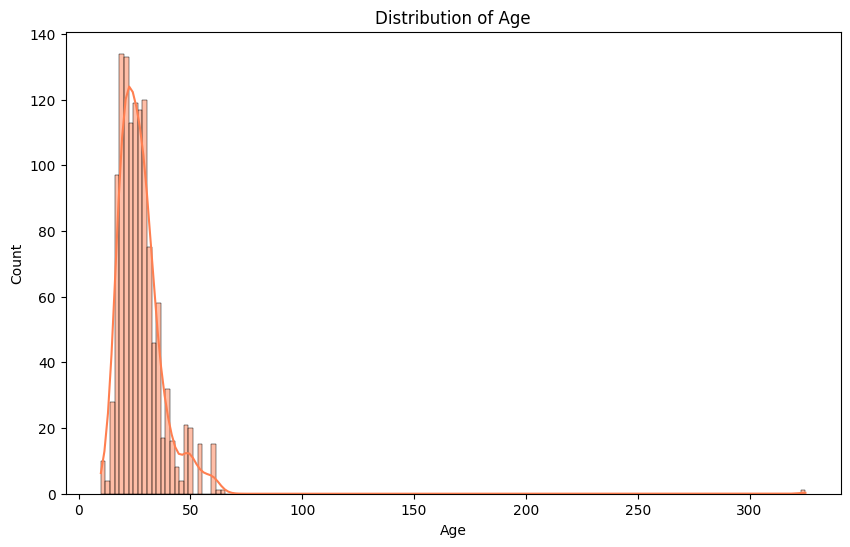

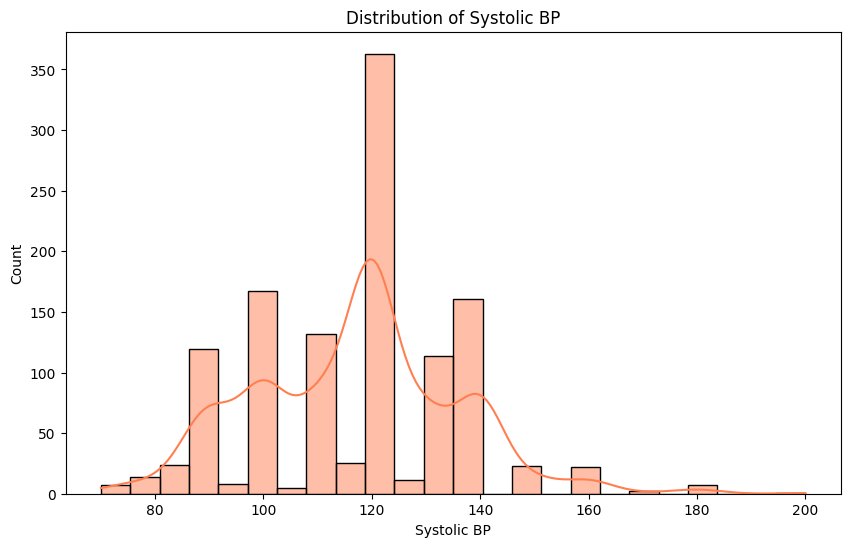

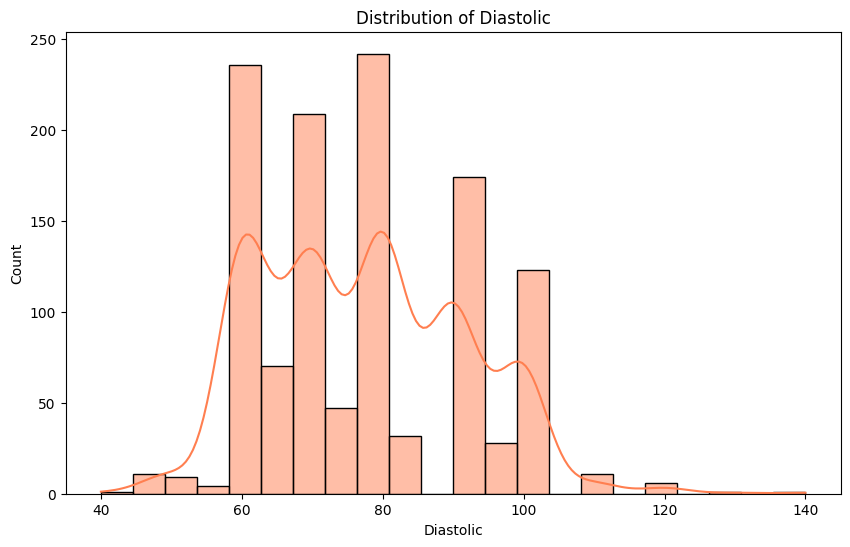

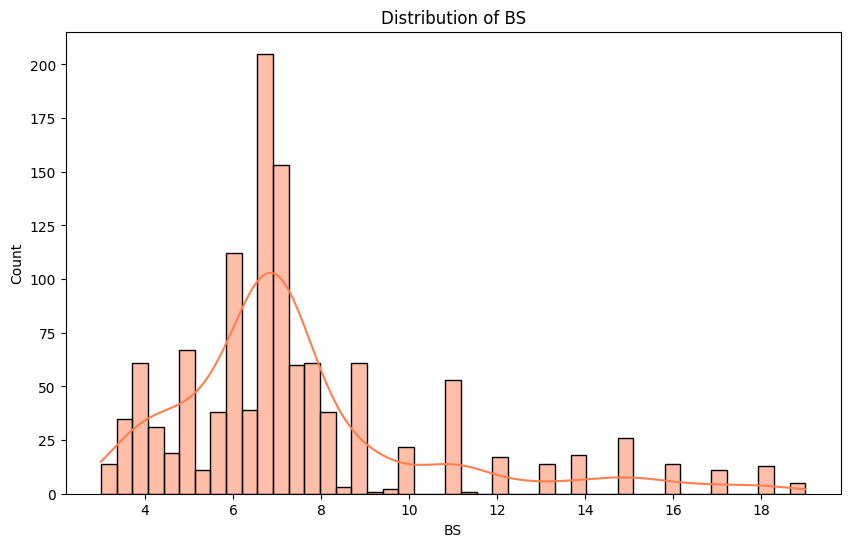

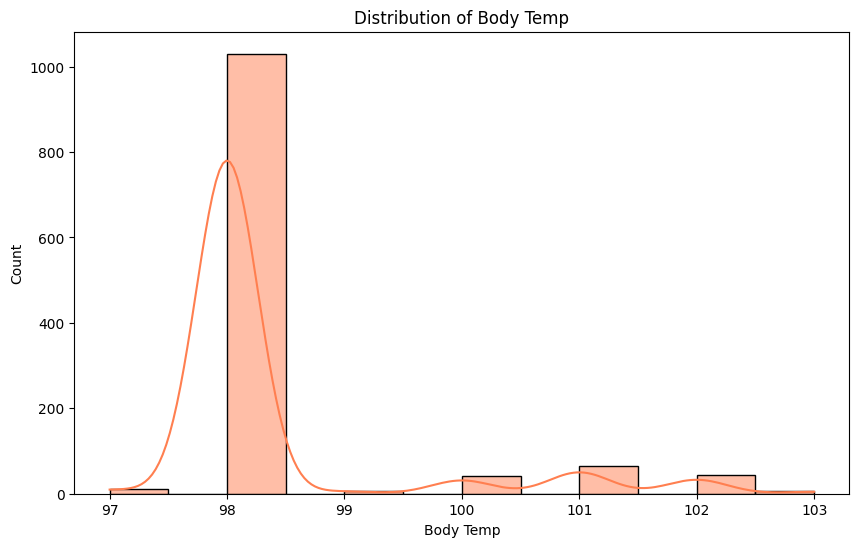

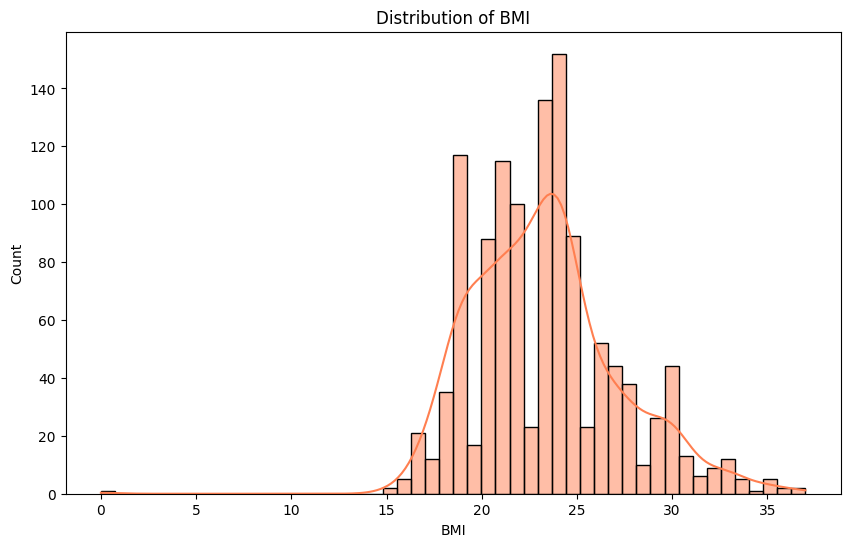

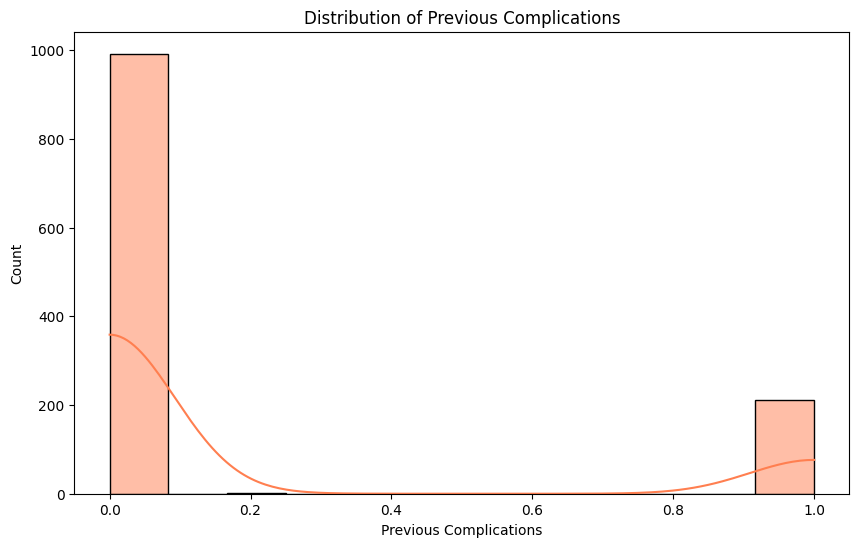

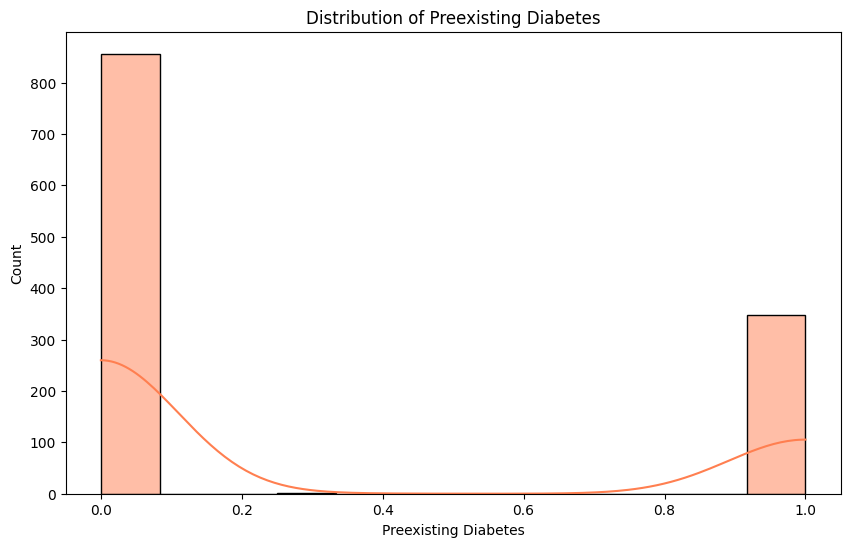

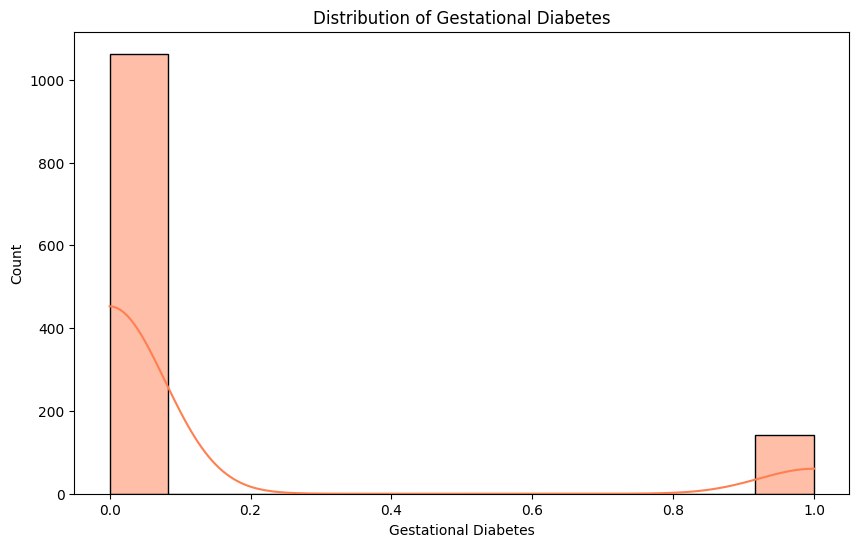

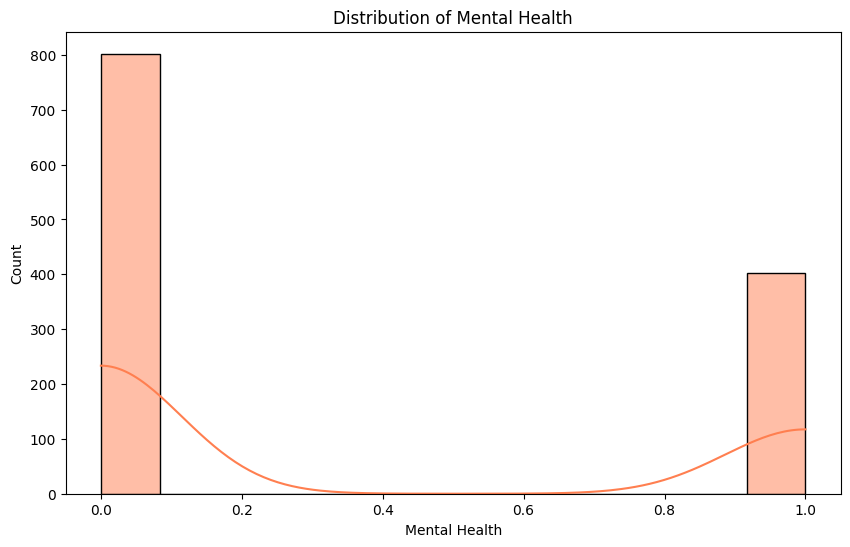

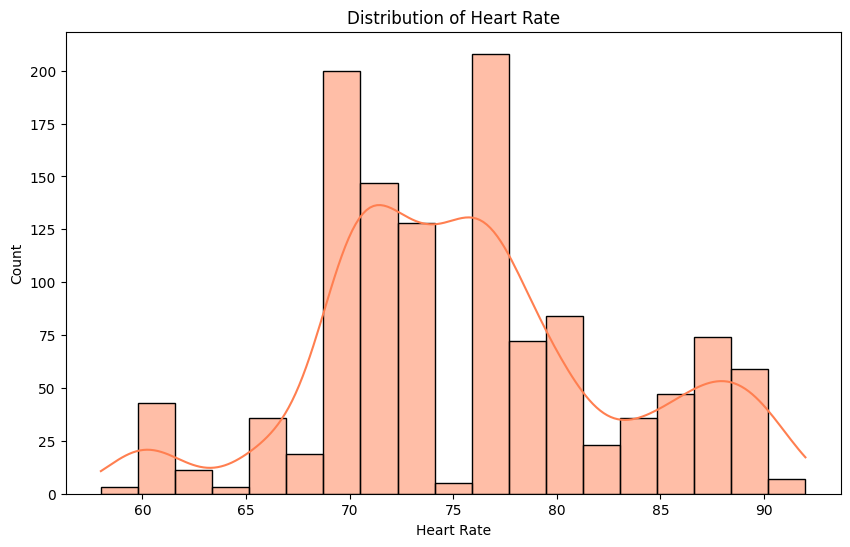

In [ ]:
for col in numerical_cols:
  plt.figure(figsize=(10, 6))
  sns.histplot(x=data[col],kde=True,color='coral')
  plt.title(f'Distribution of {col}')
  plt.show()

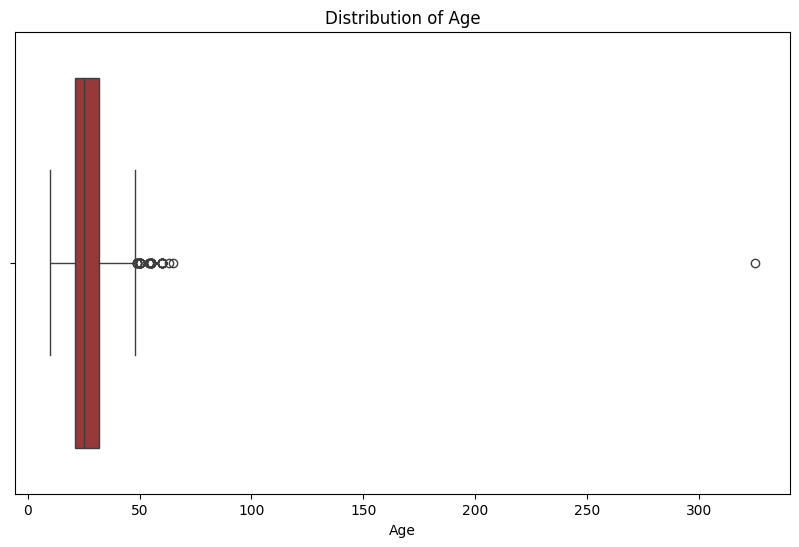

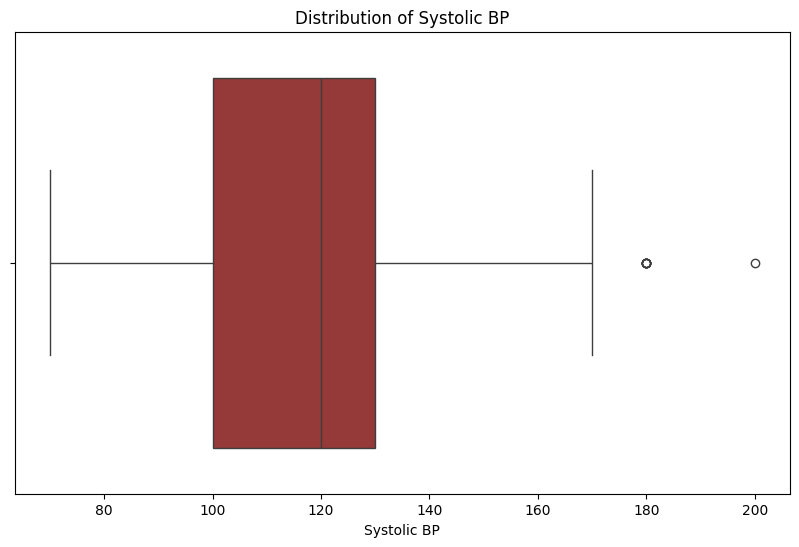

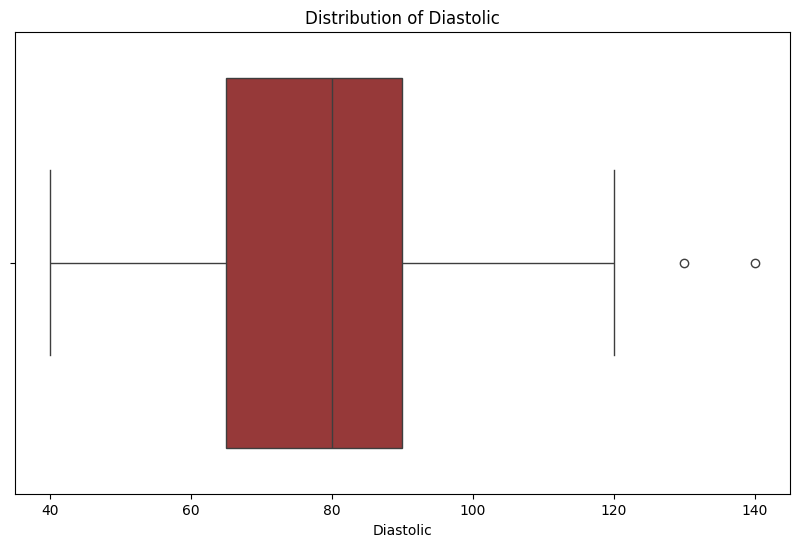

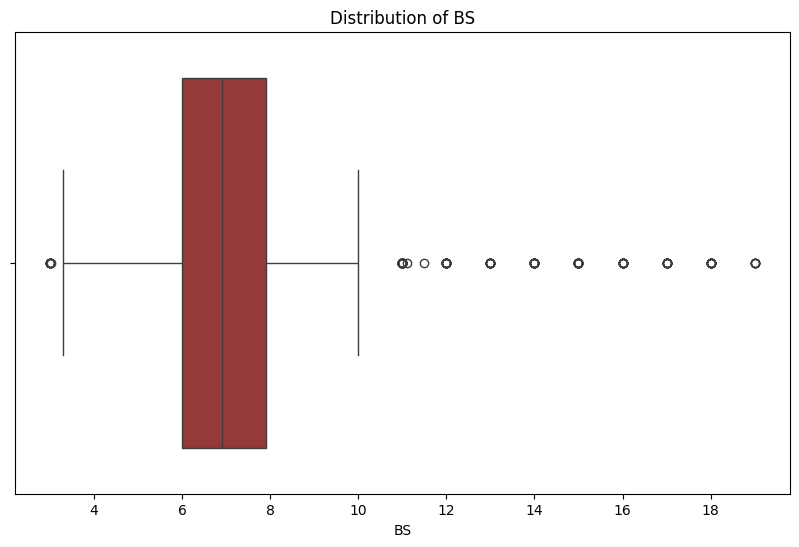

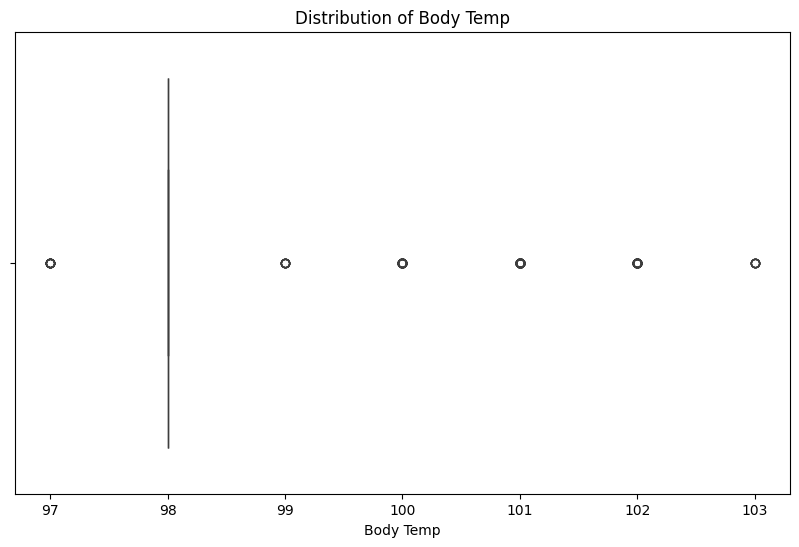

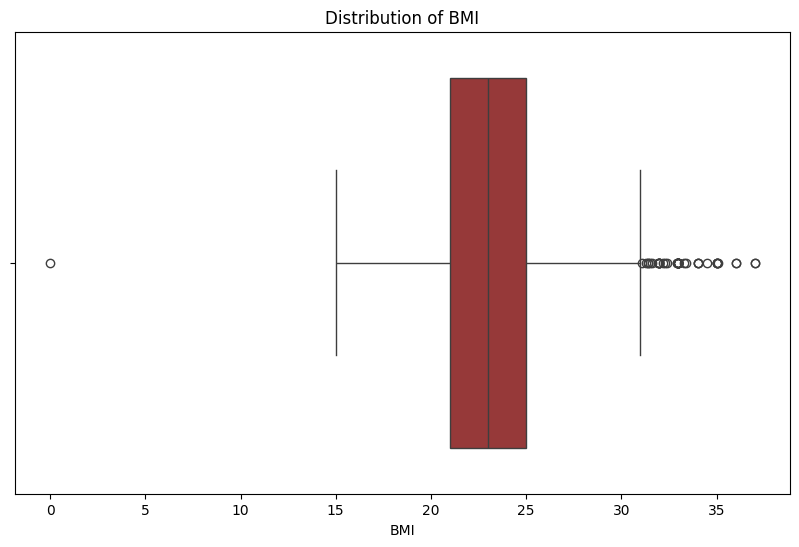

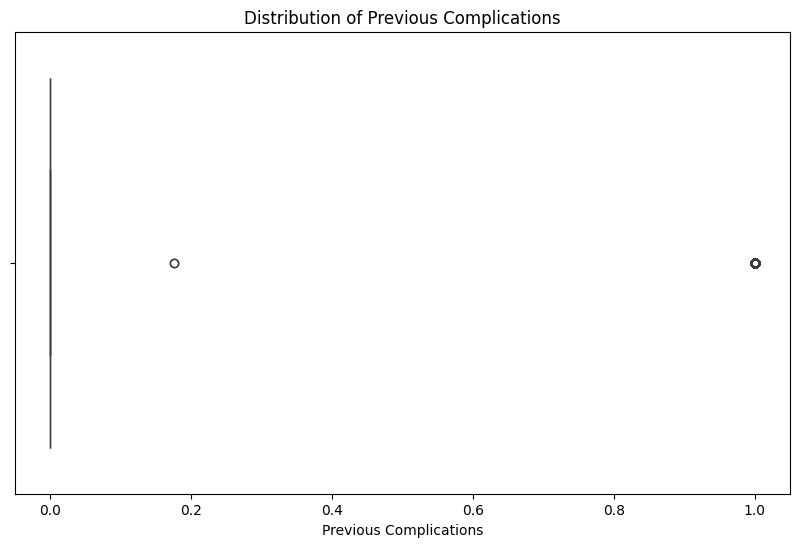

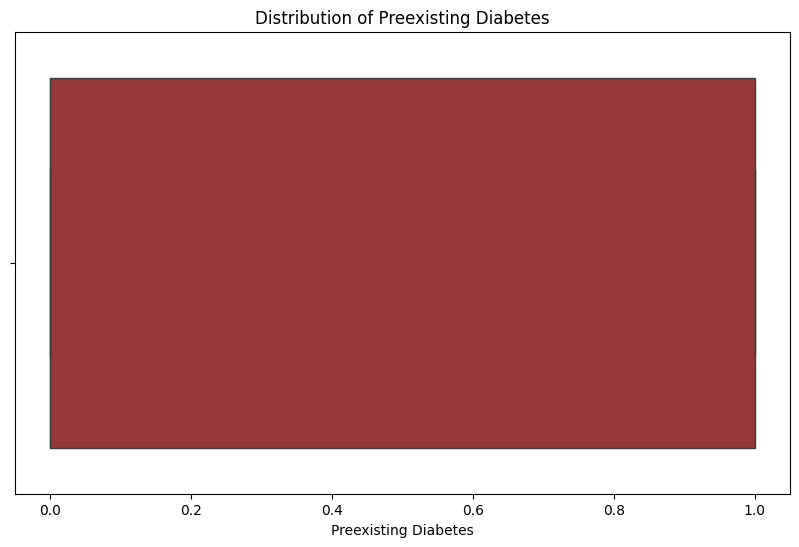

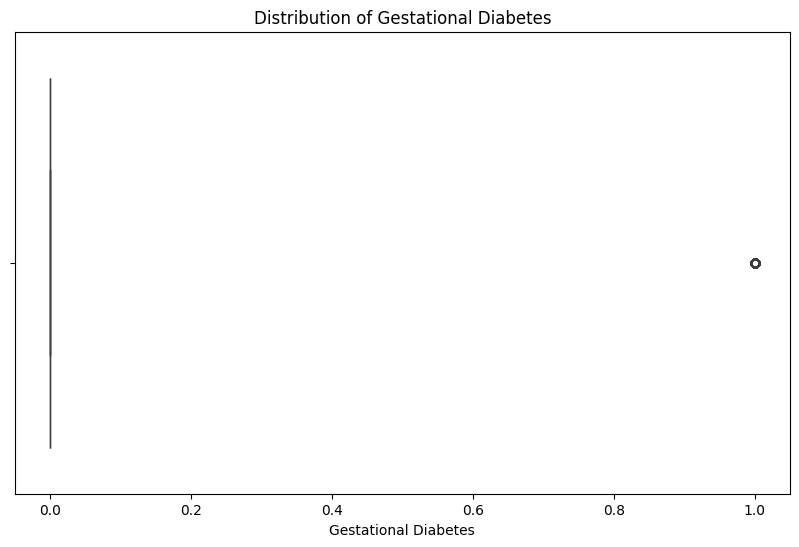

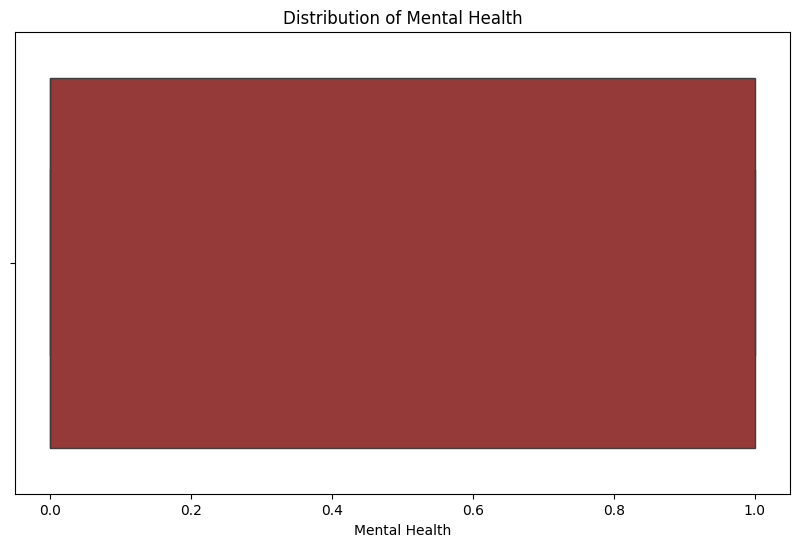

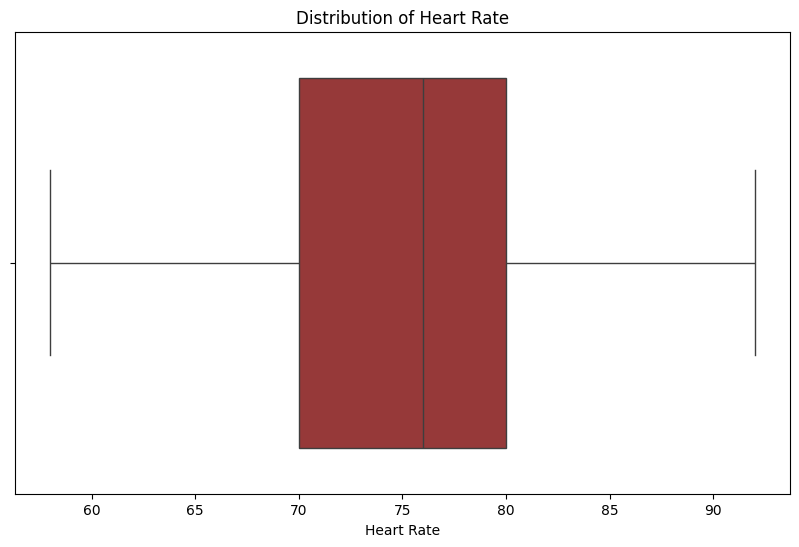

In [ ]:
#Box Plot
for col in numerical_cols:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=data[col], color='brown')
  plt.title(f'Distribution of {col}')
  plt.show()

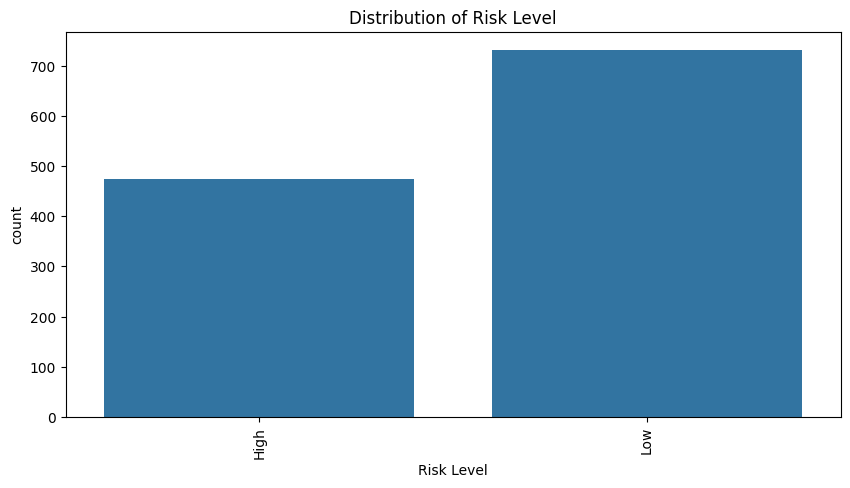

In [ ]:
# Count Plot (High Vs Low)
for col in categorical_cols:
  plt.figure(figsize=(10,5))
  sns.countplot(x=data[col])
  plt.title(f"Distribution of {col}")
  plt.xticks(rotation=90)
  plt.show()

In [ ]:
data

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate,Risk Level
0,22,90.0,60.0,9.0,100,18.0,1.0,1.0,0,1,80.0,High
1,22,110.0,70.0,7.1,98,20.4,0.0,0.0,0,0,74.0,Low
2,27,110.0,70.0,7.5,98,23.0,1.0,0.0,0,0,72.0,Low
3,20,100.0,70.0,7.2,98,21.2,0.0,0.0,0,0,74.0,Low
4,20,90.0,60.0,7.5,98,19.7,0.0,0.0,0,0,74.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,41,140.0,95.0,16.0,98,22.0,0.0,0.0,1,1,90.0,High
1201,25,110.0,90.0,6.0,98,19.0,0.0,0.0,1,1,92.0,High
1202,21,150.0,110.0,4.9,98,21.5,0.0,0.0,1,1,66.0,High
1203,23,130.0,100.0,5.1,98,27.0,0.0,0.0,1,1,60.0,High


## Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
lblencder = LabelEncoder()
data['Risk Level'] = lblencder.fit_transform(data['Risk Level'])

## Min Max Scaler

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

In [ ]:
numerical_transfer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transfer, numerical_cols),
    ('cat', 'passthrough', categorical_cols)
])
data_transformed = preprocessor.fit_transform(data)
final_columns = list(numerical_cols) + list(categorical_cols)
dataa= pd.DataFrame(data_transformed, columns=final_columns)
dataa

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate,Risk Level
0,0.038095,0.153846,0.20,0.37500,0.500000,0.486486,1.0,1.0,0.0,1.0,0.647059,0.0
1,0.038095,0.307692,0.30,0.25625,0.166667,0.551351,0.0,0.0,0.0,0.0,0.470588,1.0
2,0.053968,0.307692,0.30,0.28125,0.166667,0.621622,1.0,0.0,0.0,0.0,0.411765,1.0
3,0.031746,0.230769,0.30,0.26250,0.166667,0.572973,0.0,0.0,0.0,0.0,0.470588,1.0
4,0.031746,0.153846,0.20,0.28125,0.166667,0.532432,0.0,0.0,0.0,0.0,0.470588,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,0.098413,0.538462,0.55,0.81250,0.166667,0.594595,0.0,0.0,1.0,1.0,0.941176,0.0
1201,0.047619,0.307692,0.50,0.18750,0.166667,0.513514,0.0,0.0,1.0,1.0,1.000000,0.0
1202,0.034921,0.615385,0.70,0.11875,0.166667,0.581081,0.0,0.0,1.0,1.0,0.235294,0.0
1203,0.041270,0.461538,0.60,0.13125,0.166667,0.729730,0.0,0.0,1.0,1.0,0.058824,0.0


## Feature Selection: Correlation Analysis




> Heatmap








Age                      -0.128037
Systolic BP              -0.288258
Diastolic                -0.330602
BS                       -0.589185
Body Temp                -0.211383
BMI                      -0.518469
Previous Complications   -0.541133
Preexisting Diabetes     -0.681412
Gestational Diabetes     -0.443348
Mental Health            -0.631853
Heart Rate               -0.481174
Risk Level                1.000000
Name: Risk Level, dtype: float64


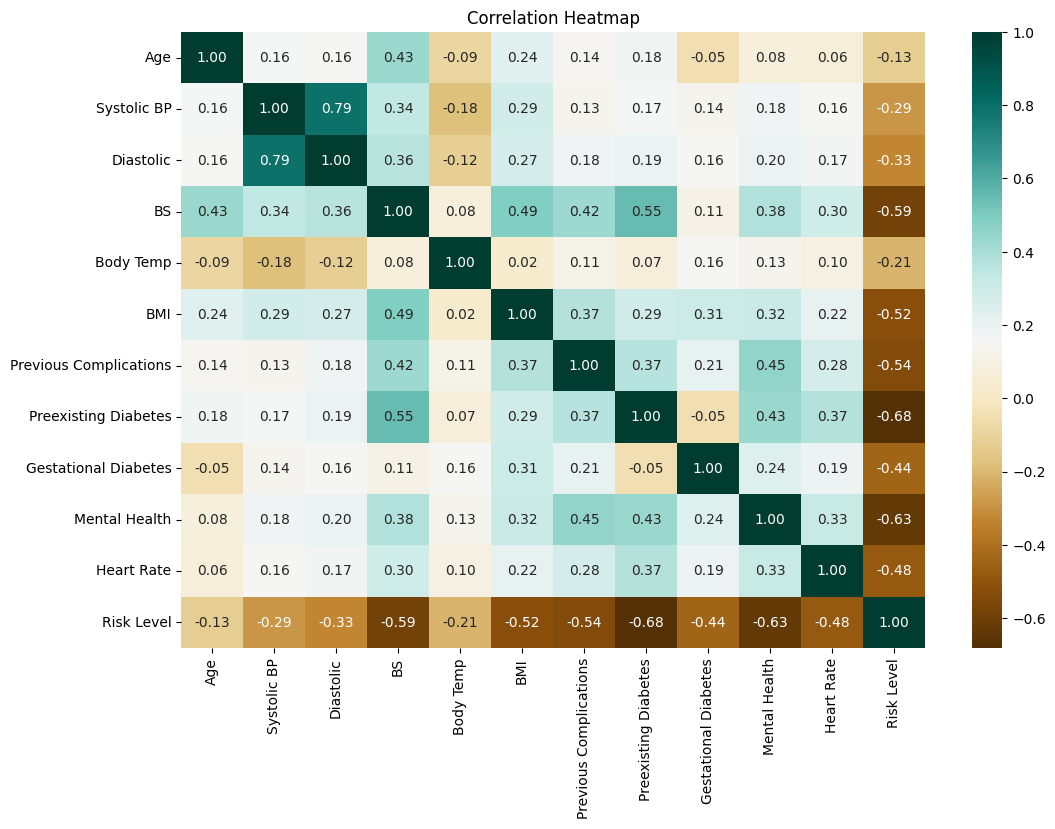

In [ ]:
correlation_matrix = dataa.corr()
print(correlation_matrix['Risk Level'])
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BrBG', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Domain Specific Knowledge

In [ ]:
selected_features = [
                     'Preexisting Diabetes',
                     'Previous Complications',
                     'BS',
                     'BMI',
                     'Systolic BP',
                     'Age',
                     'Risk Level']

filtered_data = dataa[selected_features]
filtered_data

,Preexisting Diabetes,Previous Complications,BS,BMI,Systolic BP,Age,Risk Level
0,1.0,1.0,0.37500,0.486486,0.153846,0.038095,0.0
1,0.0,0.0,0.25625,0.551351,0.307692,0.038095,1.0
2,0.0,1.0,0.28125,0.621622,0.307692,0.053968,1.0
3,0.0,0.0,0.26250,0.572973,0.230769,0.031746,1.0
4,0.0,0.0,0.28125,0.532432,0.153846,0.031746,1.0
...,...,...,...,...,...,...,...
1200,0.0,0.0,0.81250,0.594595,0.538462,0.098413,0.0
1201,0.0,0.0,0.18750,0.513514,0.307692,0.047619,0.0
1202,0.0,0.0,0.11875,0.581081,0.615385,0.034921,0.0
1203,0.0,0.0,0.13125,0.729730,0.461538,0.041270,0.0


# Model Analysis & Training

## Random Forest Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

Accuracy: 0.97
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96        95
         1.0       1.00      0.95      0.98       146

    accuracy                           0.97       241
   macro avg       0.97      0.98      0.97       241
weighted avg       0.97      0.97      0.97       241



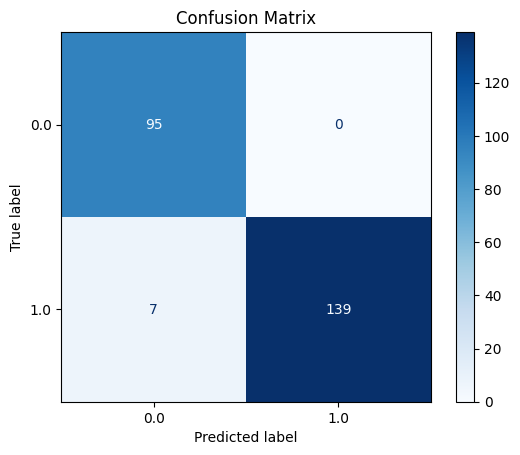

In [ ]:
x= filtered_data.drop('Risk Level', axis=1)
y= filtered_data['Risk Level']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1, class_weight='balanced', random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

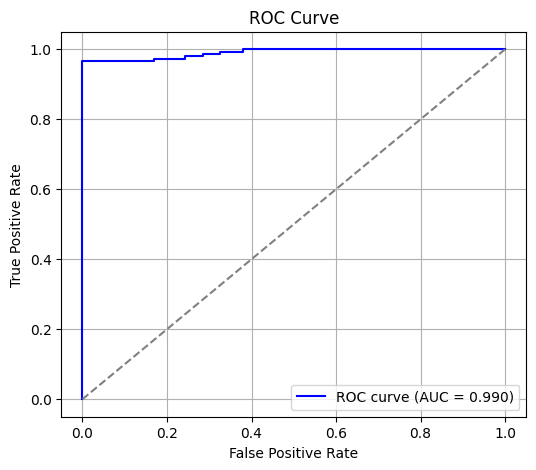

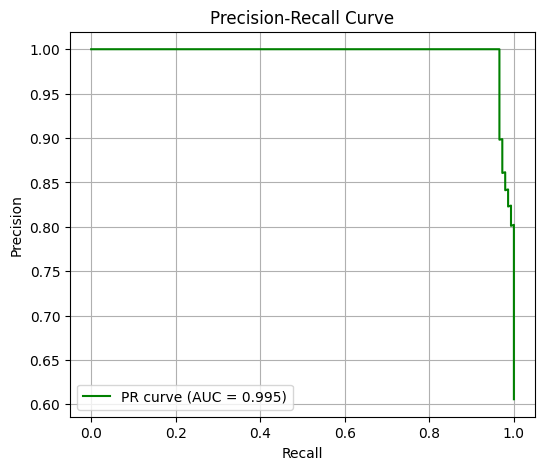

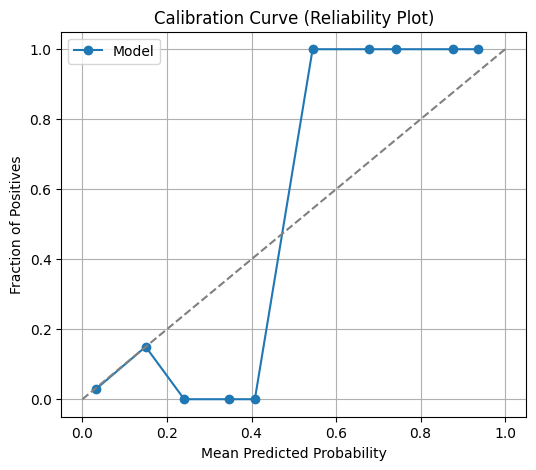

Brier Score: 0.0291


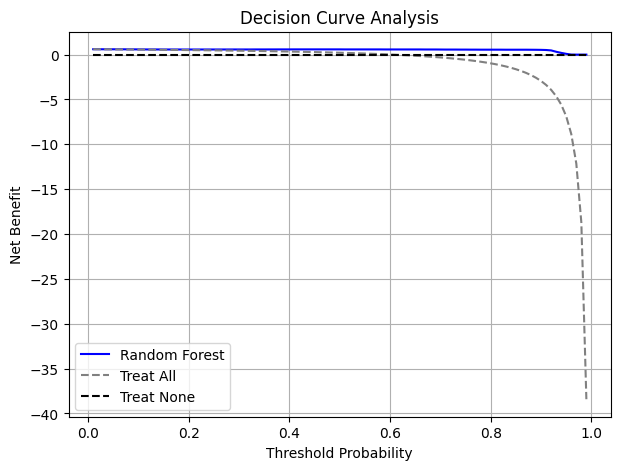

In [ ]:
from sklearn.metrics import (
    roc_curve, auc, precision_recall_curve, average_precision_score,
    brier_score_loss
)
from sklearn.calibration import calibration_curve
y_prob = model.predict_proba(x_test)[:, 1]

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, color='green', label=f'PR curve (AUC = {pr_auc:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


# ---- CALIBRATION CURVE (Reliability Plot) ----
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)

plt.figure(figsize=(6,5))
plt.plot(prob_pred, prob_true, marker='o', label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve (Reliability Plot)')
plt.legend()
plt.grid(True)
plt.show()

# Brier Score
brier = brier_score_loss(y_test, y_prob)
print(f'Brier Score: {brier:.4f}')


# ---- DECISION CURVE ANALYSIS (DCA) ----
# Helper function for net benefit calculation
def decision_curve(y_true, y_prob, thresholds=np.linspace(0.01, 0.99, 99)):
    net_benefit = []
    for t in thresholds:
        tp = np.sum((y_prob >= t) & (y_true == 1))
        fp = np.sum((y_prob >= t) & (y_true == 0))
        n = len(y_true)
        nb = (tp / n) - (fp / n) * (t / (1 - t))
        net_benefit.append(nb)
    return thresholds, np.array(net_benefit)

thresholds, nb_model = decision_curve(y_test.values, y_prob)
_, nb_all = decision_curve(y_test.values, np.ones_like(y_prob))
_, nb_none = decision_curve(y_test.values, np.zeros_like(y_prob))

plt.figure(figsize=(7,5))
plt.plot(thresholds, nb_model, label='Random Forest', color='blue')
plt.plot(thresholds, nb_all, linestyle='--', label='Treat All', color='gray')
plt.plot(thresholds, nb_none, linestyle='--', label='Treat None', color='black')
plt.xlabel('Threshold Probability')
plt.ylabel('Net Benefit')
plt.title('Decision Curve Analysis')
plt.legend()
plt.grid(True)
plt.show()

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

Accuracy: 0.92
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.87      0.90        95
         1.0       0.92      0.95      0.94       146

    accuracy                           0.92       241
   macro avg       0.92      0.91      0.92       241
weighted avg       0.92      0.92      0.92       241



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


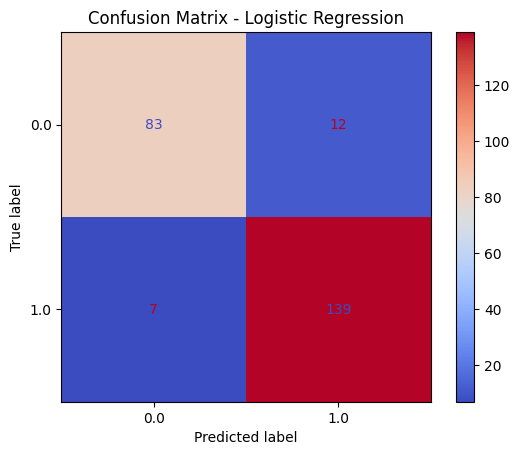

In [ ]:
x= filtered_data.drop('Risk Level', axis=1)
y= filtered_data['Risk Level']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

logreg_model = LogisticRegression(multi_class='multinomial',n_jobs=-1,penalty='l2',C=0.1,solver='saga',class_weight='balanced', random_state=42)
logreg_model.fit(x_train, y_train)
y_pred_logreg = logreg_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy: {accuracy:.2f}")
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_logreg), display_labels=logreg_model.classes_).plot(cmap='coolwarm')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

## Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

Accuracy: 0.97
SVM Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      1.00      0.96        95
         1.0       1.00      0.95      0.98       146

    accuracy                           0.97       241
   macro avg       0.97      0.98      0.97       241
weighted avg       0.97      0.97      0.97       241



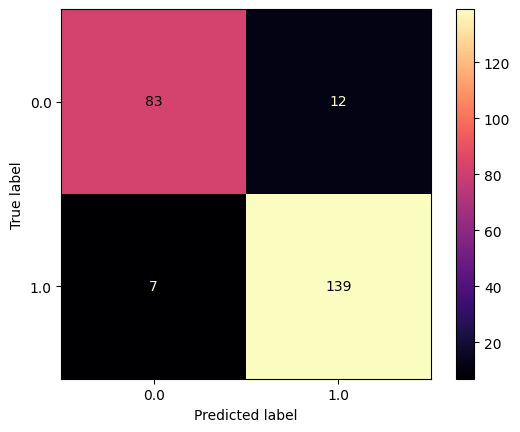

In [ ]:
modell = SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced', probability=True, random_state=42)
modell.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("SVM Classification Report:\n", classification_report(y_test, y_pred))
accuracy_svm = accuracy_score(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_logreg), display_labels=logreg_model.classes_).plot(cmap='magma')

## XGBClassifier

In [ ]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel

Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.98      0.94        95
         1.0       0.99      0.93      0.96       146

    accuracy                           0.95       241
   macro avg       0.94      0.96      0.95       241
weighted avg       0.95      0.95      0.95       241



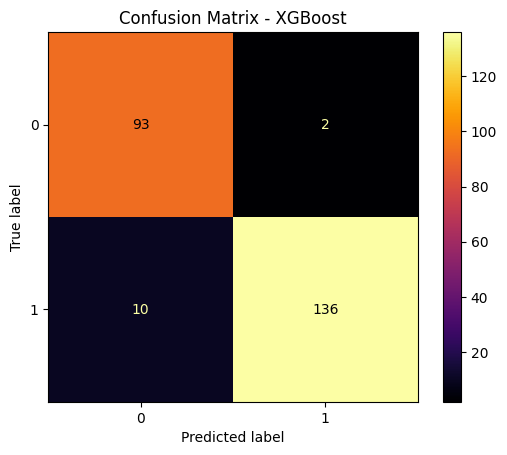

In [ ]:
x= filtered_data.drop('Risk Level', axis=1)
y= filtered_data['Risk Level']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


pipeline = Pipeline([
    ('feature_selection', SelectFromModel(XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, n_jobs=-1, random_state=42, scale_pos_weight=1))),
    ('xgb_classifier', XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, n_jobs=-1, random_state=42, scale_pos_weight=1))
])

pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=pipeline.classes_).plot(cmap='inferno')
plt.title('Confusion Matrix - XGBoost')
plt.show()

## K Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Accuracy: 0.94
KNN Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        95
         1.0       0.95      0.95      0.95       146

    accuracy                           0.94       241
   macro avg       0.94      0.94      0.94       241
weighted avg       0.94      0.94      0.94       241



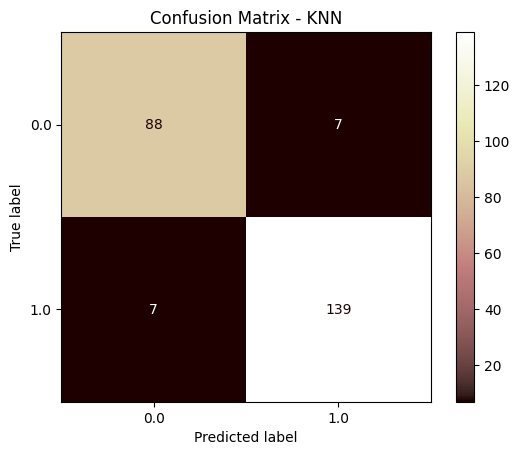

In [ ]:
knn= KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=-1)
knn.fit(x_train, y_train)
y_pred= knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("KNN Classification Report:\n", classification_report(y_test, y_pred))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=knn.classes_).plot(cmap='pink')
plt.title('Confusion Matrix - KNN')
plt.show()

## Gradient Descent

Gradient Descent Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.80      0.86        95
         1.0       0.88      0.96      0.92       146

    accuracy                           0.90       241
   macro avg       0.90      0.88      0.89       241
weighted avg       0.90      0.90      0.89       241



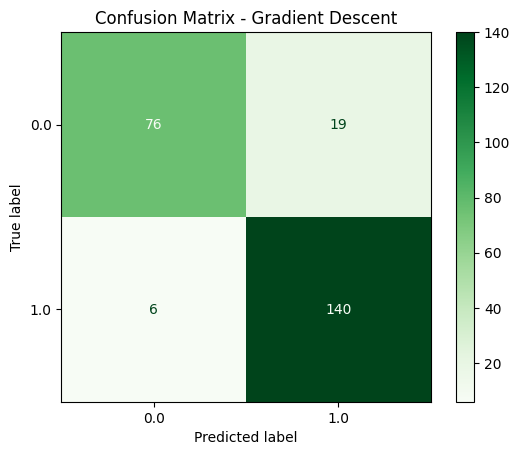

In [ ]:
# Implement Gradient Descent from scratch

# Add a column of ones for the bias term
x_train_gd = np.c_[np.ones(x_train.shape[0]), x_train]
x_test_gd = np.c_[np.ones(x_test.shape[0]), x_test]

# Initialize weights
weights = np.zeros(x_train_gd.shape[1])

# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define loss function (Binary Cross-Entropy)
def compute_loss(y_true, y_pred):
    epsilon = 1e-15  # Small value to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Define gradient descent function
def gradient_descent(x, y, weights, learning_rate, num_iterations):
    losses = []
    for _ in range(num_iterations):
        # Calculate predicted values
        z = np.dot(x, weights)
        y_pred = sigmoid(z)

        # Calculate the gradient
        gradient = np.dot(x.T, (y_pred - y)) / len(y)

        # Update weights
        weights -= learning_rate * gradient

        # Compute and store loss
        loss = compute_loss(y, y_pred)
        losses.append(loss)
    return weights, losses

# Set hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Run gradient descent on training data
trained_weights, losses = gradient_descent(x_train_gd, y_train, weights, learning_rate, num_iterations)

# Evaluate on test data
z_test = np.dot(x_test_gd, trained_weights)
y_pred_gd_prob = sigmoid(z_test)
y_pred_gd = (y_pred_gd_prob > 0.5).astype(int) # Convert probabilities to binary predictions

# Print performance metrics
print("Gradient Descent Classification Report:\n", classification_report(y_test, y_pred_gd))

cm_gd = confusion_matrix(y_test, y_pred_gd)
disp_gd = ConfusionMatrixDisplay(confusion_matrix=cm_gd, display_labels=np.unique(y_test))
disp_gd.plot(cmap='Greens')
plt.title('Confusion Matrix - Gradient Descent')
plt.show()



## Soft Voting Classifier

Soft Voting Classifier Accuracy: 0.98
Soft Voting Classifier Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        95
         1.0       1.00      0.97      0.98       146

    accuracy                           0.98       241
   macro avg       0.97      0.98      0.98       241
weighted avg       0.98      0.98      0.98       241



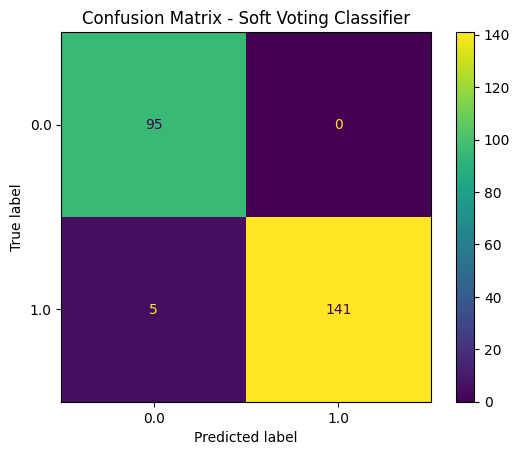

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Assuming filtered_data and 'Risk Level' are already defined from previous steps

x = filtered_data.drop('Risk Level', axis=1)
y = filtered_data['Risk Level']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Re-initialize models with probability=True for SVM if needed for soft voting
# Note: Logistic Regression, RandomForest, and XGBoost already provide predict_proba
logreg_model = LogisticRegression(multi_class='multinomial', n_jobs=-1, penalty='l2', C=0.1, solver='saga', class_weight='balanced', random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(eval_metric='logloss')
svm_model = SVC(kernel='linear', probability=True, random_state=42) # Set probability=True

# Create a list of (name, model) tuples for the voting classifier
estimators = [
    ('logistic', logreg_model),
    ('random_forest', rf_model),
    ('xgb', xgb_model),
    ('svm', svm_model) # Include SVM
]

# Create the VotingClassifier with soft voting
voting_clf = VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1)

# Train the voting classifier
voting_clf.fit(x_train, y_train)

# Predict on the test set
y_pred_voting = voting_clf.predict(x_test)

# Evaluate the voting classifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Soft Voting Classifier Accuracy: {accuracy_voting:.2f}")

print("Soft Voting Classifier Classification Report:\n", classification_report(y_test, y_pred_voting))

cm_voting = confusion_matrix(y_test, y_pred_voting)
disp_voting = ConfusionMatrixDisplay(confusion_matrix=cm_voting, display_labels=np.unique(y_test))
disp_voting.plot(cmap='viridis')
plt.title('Confusion Matrix - Soft Voting Classifier')
plt.show()

## Gaussian Naive Bayes model

Gaussian Naive Bayes Accuracy: 0.94
Gaussian Naive Bayes Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.94      0.93        95
         1.0       0.96      0.95      0.95       146

    accuracy                           0.94       241
   macro avg       0.94      0.94      0.94       241
weighted avg       0.94      0.94      0.94       241



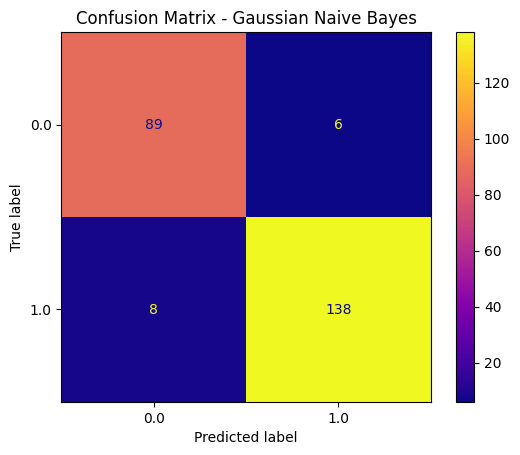

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming x_train, x_test, y_train, y_test are already defined from previous steps

# Create and train the Gaussian Naive Bayes model
gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)

# Predict on the test set
y_pred_gnb = gnb_model.predict(x_test)

# Evaluate the model
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Gaussian Naive Bayes Accuracy: {accuracy_gnb:.2f}")

print("Gaussian Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_gnb))

cm_gnb = confusion_matrix(y_test, y_pred_gnb)
disp_gnb = ConfusionMatrixDisplay(confusion_matrix=cm_gnb, display_labels=np.unique(y_test))
disp_gnb.plot(cmap='plasma')
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.show()

# SHAP

In [ ]:
!pip install shap lime
import shap

In [ ]:
def modelClassification(X, y, X_train, X_test, y_train, y_test):

# Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)

# Support Vector Machine (SVM)
    svm_model = SVC(kernel='linear')
    svm_model.fit(X_train, y_train)
    y_pred_svm = svm_model.predict(X_test)



# XGBoost
    xgb_model = XGBClassifier(eval_metric='logloss')
    xgb_model.fit(X_train, y_train)
    y_pred_xgb = xgb_model.predict(X_test)

# Logistic Regression
    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_train)
    y_pred_lr = lr_model.predict(X_test)



    return xgb_model

In [ ]:
x= filtered_data.drop('Risk Level', axis=1)
y= filtered_data['Risk Level']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
xgb_model = modelClassification(x, y, x_train, x_test, y_train, y_test)

In [ ]:
# Create and train the XGBoost model directly
xgb_model_shap = XGBClassifier(eval_metric='logloss', random_state=42) # Added random_state for reproducibility
xgb_model_shap.fit(x_train, y_train)

# Create the SHAP explainer object using shap.KernelExplainer
# KernelExplainer needs a prediction function and a background dataset.
# We'll use the predict_proba function and take a sample of the training data as background.
# The prediction function should return the probability of the class we want to explain (e.g., class 0 for High Risk)
predict_fn = lambda x: xgb_model_shap.predict_proba(x)[:, 0]

# Use a sample of the training data as the background dataset (KernelExplainer is slower)
background_data = x_train.sample(n=100, random_state=42) # Adjust sample size if needed

explainer_xgb = shap.KernelExplainer(predict_fn, background_data)

# Get SHAP values for a sample of the test data
# Explaining the whole dataset with KernelExplainer can be very slow.
x_test_sample = x_test.sample(n=50, random_state=42) # Adjust sample size if needed
shap_values_xgb = explainer_xgb.shap_values(x_test_sample)

# shap_values_xgb from KernelExplainer is typically a numpy array
shap_values_for_plot = shap_values_xgb


# Now you can use shap_values_for_plot and x_test_sample for plotting
# For example, the summary plot:
# shap.summary_plot(shap_values_for_plot, x_test_sample)

# The rest of your SHAP plotting code will likely use shap_values_for_plot

## Dependency Shap value for top feature

In [ ]:
# Get the feature index with the highest mean absolute SHAP value
mean_shap = np.abs(shap_values_for_plot).mean(axis=0)
top_feature_index = np.argmax(mean_shap)
top_feature_name = x_test_sample.columns[top_feature_index] # Use x_test_sample columns

# Plot dependency for that top feature
shap.dependence_plot(
    ind=top_feature_name,
    shap_values=shap_values_for_plot, # Use SHAP values calculated on the sample
    features=x_test_sample # Use the sampled test data features
)

## Force Plot

In [ ]:
shap.initjs()

# Use KernelExplainer as a fallback since TreeExplainer is causing issues
# KernelExplainer needs a prediction function and a background dataset.
# We'll use the predict_proba function for class 0 (High Risk)
# and a sample of the training data as background.
predict_fn = lambda x: xgb_model_shap.predict_proba(x)[:, 0]

# Use a sample of the training data as the background dataset (KernelExplainer is slower)
background_data = x_train.sample(n=50, random_state=42) # Using a smaller sample for speed

explainer_xgb_kernel = shap.KernelExplainer(predict_fn, background_data)

# Calculate SHAP values for the first instance in the training data
# Using a single instance for the force plot
instance_to_explain_force = x_train.iloc[0:1]
shap_values_xgb_force = explainer_xgb_kernel.shap_values(instance_to_explain_force)

# Force plot for the first instance
shap.force_plot(explainer_xgb_kernel.expected_value, shap_values_xgb_force[0,:], instance_to_explain_force.iloc[0,:])

In [ ]:
# Create the SHAP explainer using KernelExplainer as TreeExplainer is causing issues
# KernelExplainer needs a prediction function and a background dataset.
# We'll use the predict_proba function for class 0 (High Risk)
# and a sample of the training data as background.
predict_fn = lambda x: xgb_model_shap.predict_proba(x)[:, 0]

# Use a sample of the training data as the background dataset (KernelExplainer is slower)
# Using a larger sample for summary plot than force plot, but still not the whole dataset
background_data_summary = x_train.sample(n=100, random_state=42) # Adjust sample size as needed

explainer_xgb_summary = shap.KernelExplainer(predict_fn, background_data_summary)

# Calculate SHAP values for a sample of the training data for the summary plot
# Explaining the whole dataset with KernelExplainer is very slow.
x_train_sample_summary = x_train.sample(n=200, random_state=42) # Adjust sample size as needed
shap_values_xgb_summary = explainer_xgb_summary.shap_values(x_train_sample_summary)

shap.initjs()

# For SHAP summary plot (bar plot)
shap.summary_plot(shap_values_xgb_summary, x_train_sample_summary, plot_type="bar", color='orange', show=False)
plt.title("SHAP Summary Plot (Bar) - Explainer on Sample")
plt.show()

# create a detailed SHAP summary plot (beeswarm plot) to see the distribution
shap.summary_plot(shap_values_xgb_summary, x_train_sample_summary, plot_type='dot', show=False)
plt.title("SHAP Summary Plot (Beeswarm) - Explainer on Sample")
plt.show()

# LIME

In [ ]:
import lime
from lime import lime_tabular
import lime.lime_tabular

In [ ]:
# Create a LIME explainer object
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train),
    feature_names=x_train.columns,
    class_names=['Negative', 'Positive'],  # Adjust based on target classes
    mode='classification'
)

# Select the instance to explain
i = 1  # Index of the instance in the test set
instance = x_train.iloc[i]

# Generate explanations
exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=xgb_model.predict_proba
)

# Visualize the explanation
exp.show_in_notebook(show_table=True, show_all=False)

# K-Fold Cross-Validation & ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

In [ ]:
# Prepare models to compare
models = [
    ('Random Forest', model),
    ('XGBoost', xgb_model),
    ('SVM', modell),
    ('Logistic Regression', logreg_model)
]

# Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


## K-Fold Cross-Validation

In [ ]:
# Re-create models without the deprecated parameter for cross-validation
rf_model_cv = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model_cv = SVC(kernel='linear')
xgb_model_cv = XGBClassifier(eval_metric='logloss')
lr_model_cv = LogisticRegression()

# models to compare for cross-validation
models_cv = [
    ('Random Forest', rf_model_cv),
    ('XGBoost', xgb_model_cv),
    ('SVM', svm_model_cv),
    ('Logistic Regression', lr_model_cv)
]

print("K-Fold Cross-Validation Accuracy Scores:")
for name, model_cv in models_cv:
    # Using cross_val_score for simple cross-validated accuracy
    from sklearn.model_selection import cross_val_score
    try:
        scores = cross_val_score(model_cv, x, y, cv=cv, scoring='accuracy')
        print(f"{name}: Mean Accuracy = {scores.mean():.2f} ± {scores.std():.2f}")
    except Exception as e:
         print(f"Error computing cross_val_score for {name}: {e}")

## ROC Curve Comparison

# Artificial Neural Network

In [ ]:
!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ANN Accuracy: 0.95
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
ANN Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.97      0.94        95
         1.0       0.98      0.94      0.96       146

    accuracy                           0.95       241
   macro avg       0.94      0.95      0.95       241
weighted avg       0.95      0.95      0.95       241



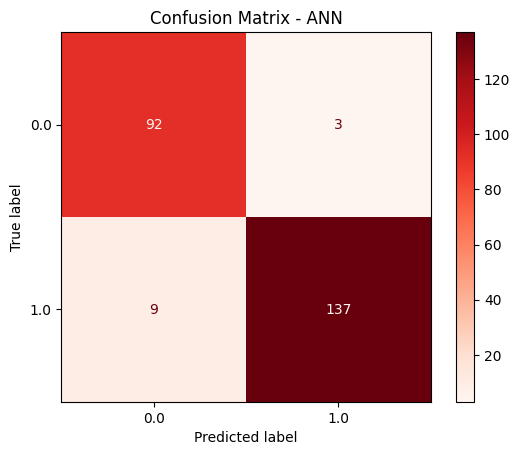

In [ ]:
# Separate features and target
x = filtered_data.drop('Risk Level', axis=1)
y = filtered_data['Risk Level']

# Scale features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns) # Convert back to DataFrame for split

# Split data
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Convert target to categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Define the ANN model
ann_model = Sequential()
ann_model.add(Dense(64, activation='relu', input_shape=(x_train_scaled.shape[1],)))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(y_train_cat.shape[1], activation='softmax')) # Output layer with number of classes

# Compile the model
ann_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
history = ann_model.fit(x_train_scaled, y_train_cat, epochs=20, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model
loss, accuracy = ann_model.evaluate(x_test_scaled, y_test_cat, verbose=0)
print(f"ANN Accuracy: {accuracy:.2f}")

y_pred_ann_prob = ann_model.predict(x_test_scaled)
y_pred_ann = np.argmax(y_pred_ann_prob, axis=1)

# Print classification report and confusion matrix
print("ANN Classification Report:\n", classification_report(y_test, y_pred_ann))

cm_ann = confusion_matrix(y_test, y_pred_ann)
disp_ann = ConfusionMatrixDisplay(confusion_matrix=cm_ann, display_labels=np.unique(y_test))
disp_ann.plot(cmap='Reds')
plt.title('Confusion Matrix - ANN')
plt.show()




## Loss Function Curve

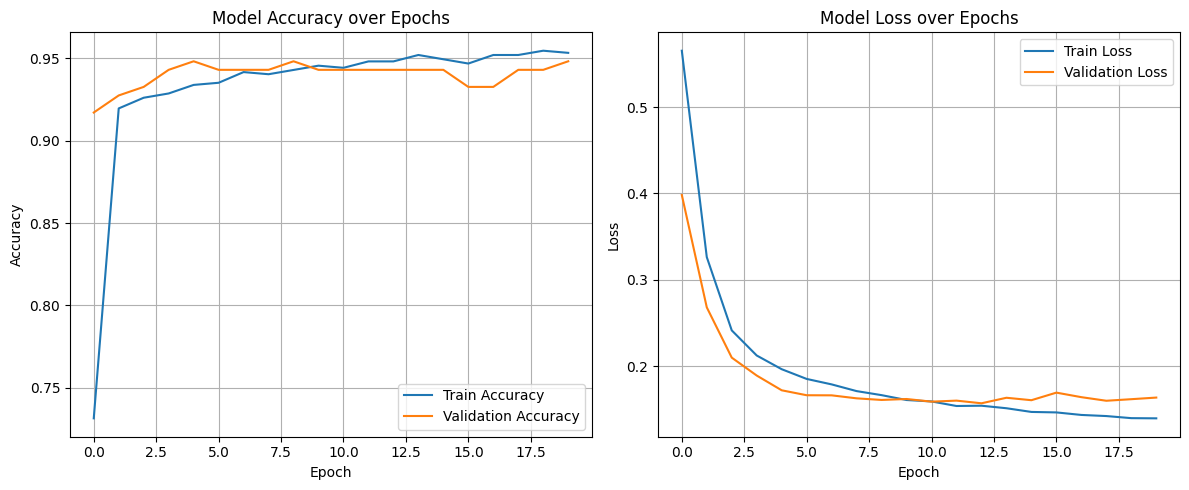

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Soft Voting Classifier with All Models Accuracy: 0.95
Soft Voting Classifier with All Models Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.94      0.93        95
         1.0       0.96      0.95      0.96       146

    accuracy                           0.95       241
   macro avg       0.94      0.94      0.94       241
weighted avg       0.95      0.95      0.95       241



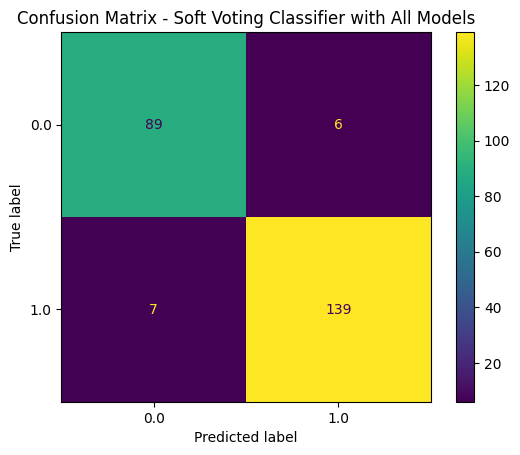

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Assuming filtered_data and 'Risk Level' are already defined from previous steps

x = filtered_data.drop('Risk Level', axis=1)
y = filtered_data['Risk Level']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Re-initialize models with probability=True for SVM if needed for soft voting
# Note: Logistic Regression, RandomForest, XGBoost, and GaussianNB already provide predict_proba
logreg_model = LogisticRegression(multi_class='multinomial', n_jobs=-1, penalty='l2', C=0.1, solver='saga', class_weight='balanced', random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(eval_metric='logloss')
svm_model = SVC(kernel='linear', probability=True, random_state=42) # Set probability=True
gnb_model = GaussianNB()

# Create a list of (name, model) tuples for the voting classifier
estimators = [
    ('logistic', logreg_model),
    ('random_forest', rf_model),
    ('xgb', xgb_model),
    ('svm', svm_model), # Include SVM
    ('gnb', gnb_model) # Include Gaussian Naive Bayes
]

# Create the VotingClassifier with soft voting
voting_clf_all = VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1)

# Train the voting classifier
voting_clf_all.fit(x_train, y_train)

# Predict on the test set
y_pred_voting_all = voting_clf_all.predict(x_test)

# Evaluate the voting classifier
accuracy_voting_all = accuracy_score(y_test, y_pred_voting_all)
print(f"Soft Voting Classifier with All Models Accuracy: {accuracy_voting_all:.2f}")

print("Soft Voting Classifier with All Models Classification Report:\n", classification_report(y_test, y_pred_voting_all))

cm_voting_all = confusion_matrix(y_test, y_pred_voting_all)
disp_voting_all = ConfusionMatrixDisplay(confusion_matrix=cm_voting_all, display_labels=np.unique(y_test))
disp_voting_all.plot(cmap='viridis')
plt.title('Confusion Matrix - Soft Voting Classifier with All Models')
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


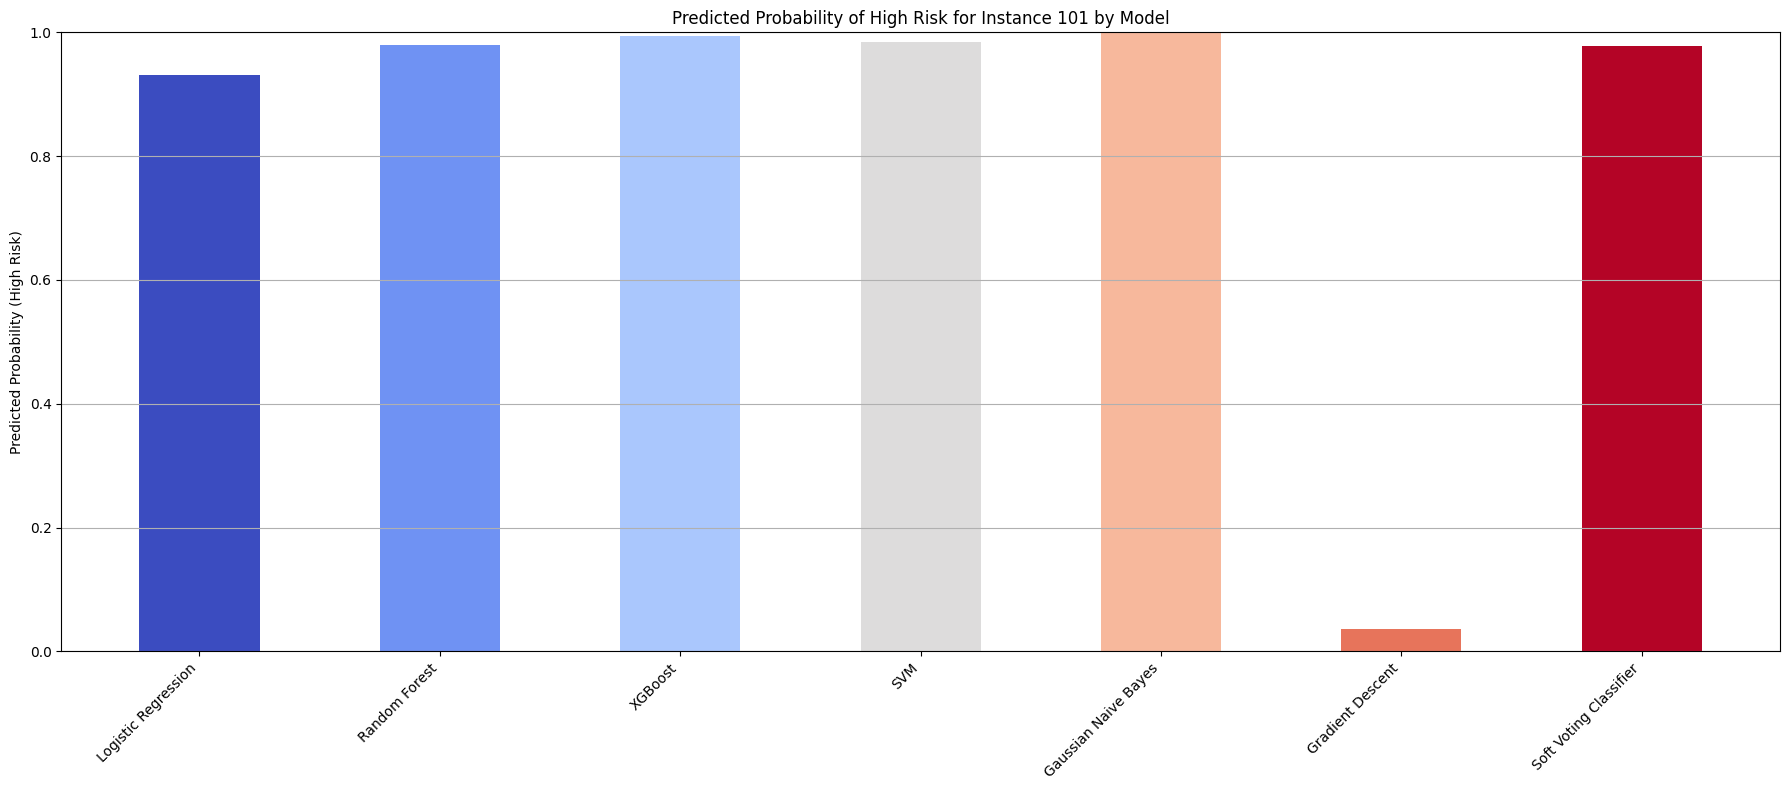

In [ ]:
# Select the first instance from the test set
instance_to_explain = x_test.iloc[0:1] # Use slicing to keep it as a DataFrame

# Re-initialize and fit models
logreg_model = LogisticRegression(multi_class='multinomial', n_jobs=-1, penalty='l2', C=0.1, solver='saga', class_weight='balanced', random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(eval_metric='logloss')
svm_model = SVC(kernel='linear', probability=True, random_state=42)
gnb_model = GaussianNB()
# Removed KNN model from here as it caused an error with probability=True

# For Gradient Descent, we need the scaled data and the custom implementation
# Assuming x_train_scaled and x_test_scaled are available from previous steps (ANN section)
# If not, we would need to scale the data here.

# Define sigmoid function and gradient descent function from previous cell (BhNi7U9DvgYe)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y_true, y_pred):
    epsilon = 1e-15  # Small value to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def gradient_descent(x, y, weights, learning_rate, num_iterations):
    losses = []
    for _ in range(num_iterations):
        z = np.dot(x, weights)
        y_pred = sigmoid(z)
        gradient = np.dot(x.T, (y_pred - y)) / len(y)
        weights -= learning_rate * gradient
        loss = compute_loss(y, y_pred)
        losses.append(loss)
    return weights, losses

# Assuming x_train_scaled is available
# Add a column of ones for the bias term to scaled data
x_train_gd = np.c_[np.ones(x_train_scaled.shape[0]), x_train_scaled]
x_test_gd = np.c_[np.ones(x_test_scaled.shape[0]), x_test_scaled]
instance_to_explain_gd = np.c_[np.ones(instance_to_explain.shape[0]), scaler.transform(instance_to_explain)]


# Initialize weights and hyperparameters for Gradient Descent
weights_gd = np.zeros(x_train_gd.shape[1])
learning_rate_gd = 0.01
num_iterations_gd = 1000

# Fit Gradient Descent model
trained_weights_gd, losses_gd = gradient_descent(x_train_gd, y_train, weights_gd, learning_rate_gd, num_iterations_gd)


logreg_model.fit(x_train, y_train)
rf_model.fit(x_train, y_train)
xgb_model.fit(x_train, y_train)
svm_model.fit(x_train, y_train)
gnb_model.fit(x_train, y_train)


# Create and fit the VotingClassifier with soft voting (excluding KNN and custom GD)
estimators = [
    ('logistic', logreg_model),
    ('random_forest', rf_model),
    ('xgb', xgb_model),
    ('svm', svm_model),
    ('gnb', gnb_model)
]
voting_clf_all = VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1)
voting_clf_all.fit(x_train, y_train)


# Get predicted probabilities for the "High Risk" class (class 0) from each model
probabilities_high_risk = {
    'Logistic Regression': logreg_model.predict_proba(instance_to_explain)[0][0],
    'Random Forest': rf_model.predict_proba(instance_to_explain)[0][0],
    'XGBoost': xgb_model.predict_proba(instance_to_explain)[0][0],
    'SVM': svm_model.predict_proba(instance_to_explain)[0][0],
    'Gaussian Naive Bayes': gnb_model.predict_proba(instance_to_explain)[0][0],
    # Removed KNN from here
    'Gradient Descent': sigmoid(np.dot(instance_to_explain_gd, trained_weights_gd))[0], # Get probability for High Risk (class 0)
    'Soft Voting Classifier': voting_clf_all.predict_proba(instance_to_explain)[0][0]
}

model_names = list(probabilities_high_risk.keys())
high_risk_probs = list(probabilities_high_risk.values())

plt.figure(figsize=(18, 8)) # Increase figure size to accommodate more bars
bar_width = 0.5 # Adjust bar width for a single set of bars

# Using the 'coolwarm' colormap
colors = plt.cm.coolwarm(np.linspace(0, 1, len(model_names)))

plt.bar(model_names, high_risk_probs, bar_width, color=colors)

plt.ylabel('Predicted Probability (High Risk)')
plt.title(f'Predicted Probability of High Risk for Instance {x_test.index[0]} by Model')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


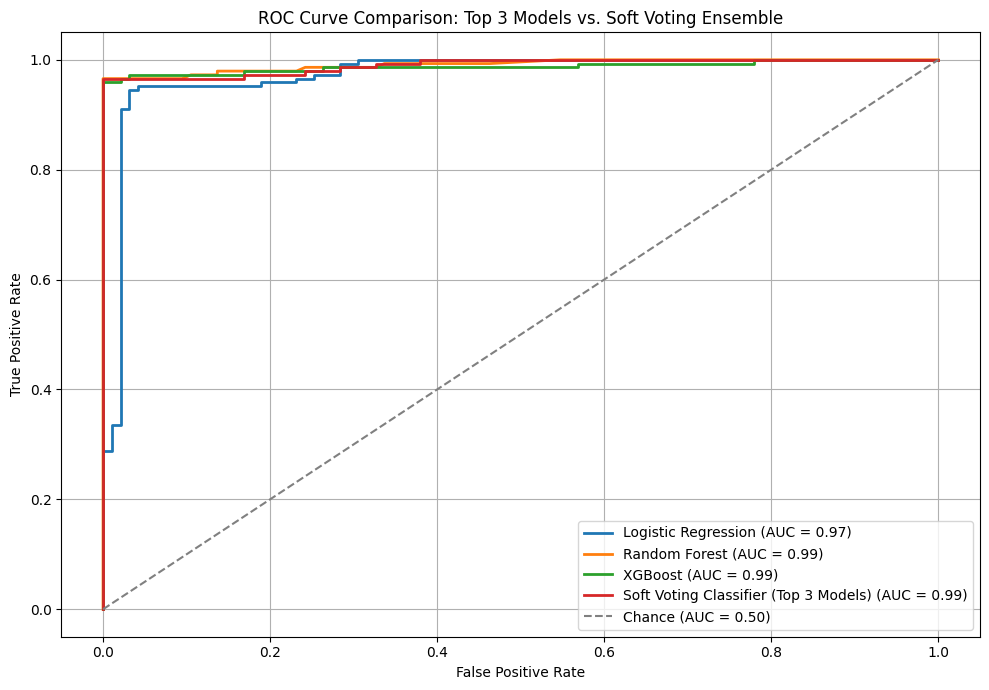

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split


# Assuming filtered_data and 'Risk Level' are already defined from previous steps

x = filtered_data.drop('Risk Level', axis=1)
y = filtered_data['Risk Level']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Initialize the 3 best models
logreg_model_roc = LogisticRegression(multi_class='multinomial', n_jobs=-1, penalty='l2', C=0.1, solver='saga', class_weight='balanced', random_state=42)
rf_model_roc = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model_roc = XGBClassifier(eval_metric='logloss')

# Create the Soft Voting Classifier with the 3 best models
estimators_best3_roc = [
    ('logistic', logreg_model_roc),
    ('random_forest', rf_model_roc),
    ('xgb', xgb_model_roc)
]
voting_clf_best3_roc = VotingClassifier(estimators=estimators_best3_roc, voting='soft', n_jobs=-1)

# Fit all models
logreg_model_roc.fit(x_train, y_train)
rf_model_roc.fit(x_train, y_train)
xgb_model_roc.fit(x_train, y_train)
voting_clf_best3_roc.fit(x_train, y_train)


# Define models to plot
models_to_plot_roc = [
    ('Logistic Regression', logreg_model_roc),
    ('Random Forest', rf_model_roc),
    ('XGBoost', xgb_model_roc),
    ('Soft Voting Classifier (Top 3 Models)', voting_clf_best3_roc)
]

plt.figure(figsize=(10, 7))

for name, model in models_to_plot_roc:
    # Predict probabilities (class 1)
    y_proba = model.predict_proba(x_test)[:, 1]

    # Compute ROC and AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot each ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Add chance diagonal
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Chance (AUC = 0.50)')

# Plot formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Top 3 Models vs. Soft Voting Ensemble')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


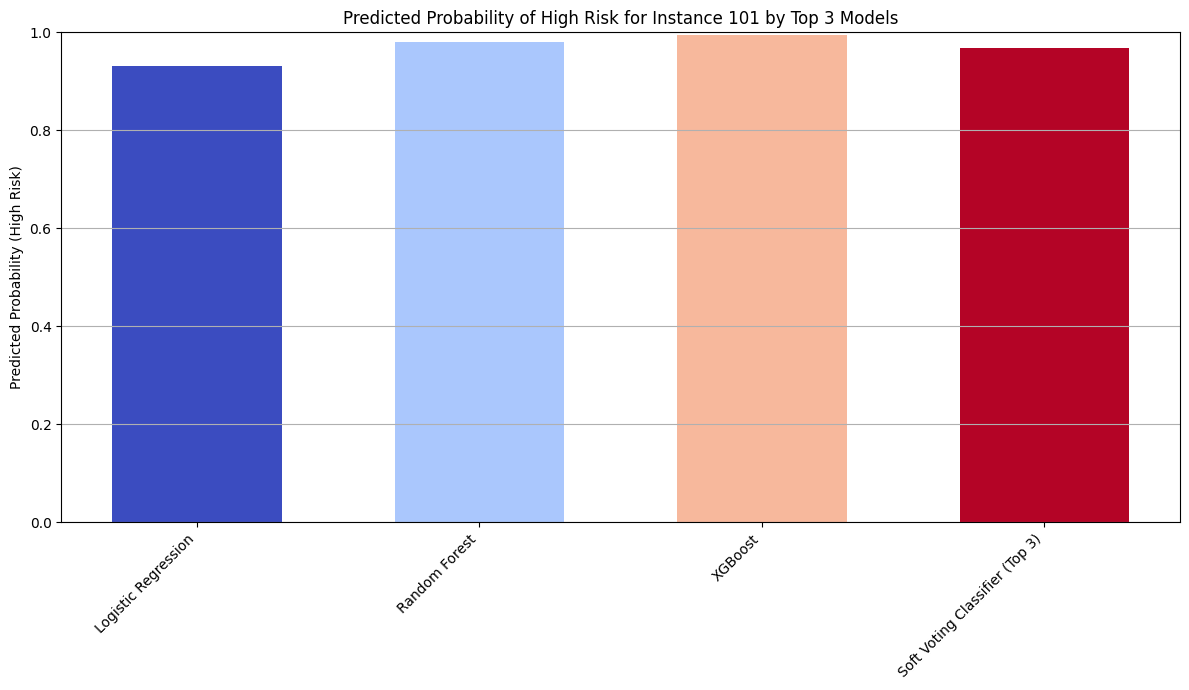

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming filtered_data and 'Risk Level' are already defined from previous steps

x = filtered_data.drop('Risk Level', axis=1)
y = filtered_data['Risk Level']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Initialize and fit the 3 best models
logreg_model_best3 = LogisticRegression(multi_class='multinomial', n_jobs=-1, penalty='l2', C=0.1, solver='saga', class_weight='balanced', random_state=42)
rf_model_best3 = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model_best3 = XGBClassifier(eval_metric='logloss')

logreg_model_best3.fit(x_train, y_train)
rf_model_best3.fit(x_train, y_train)
xgb_model_best3.fit(x_train, y_train)


# Create and fit the Soft Voting Classifier with the 3 best models
estimators_best3 = [
    ('logistic', logreg_model_best3),
    ('random_forest', rf_model_best3),
    ('xgb', xgb_model_best3)
]
voting_clf_best3 = VotingClassifier(estimators=estimators_best3, voting='soft', n_jobs=-1)
voting_clf_best3.fit(x_train, y_train)


# Select the first instance from the test set to explain
instance_to_explain = x_test.iloc[0:1]

# Get predicted probabilities for the "High Risk" class (class 0) from each model
probabilities_high_risk_best3 = {
    'Logistic Regression': logreg_model_best3.predict_proba(instance_to_explain)[0][0],
    'Random Forest': rf_model_best3.predict_proba(instance_to_explain)[0][0],
    'XGBoost': xgb_model_best3.predict_proba(instance_to_explain)[0][0],
    'Soft Voting Classifier (Top 3)': voting_clf_best3.predict_proba(instance_to_explain)[0][0]
}

model_names_best3 = list(probabilities_high_risk_best3.keys())
high_risk_probs_best3 = list(probabilities_high_risk_best3.values())

plt.figure(figsize=(12, 7))
bar_width_best3 = 0.6

# Using a colormap for the bars - changed to 'coolwarm'
colors_best3 = plt.cm.coolwarm(np.linspace(0, 1, len(model_names_best3)))

plt.bar(model_names_best3, high_risk_probs_best3, bar_width_best3, color=colors_best3)

plt.ylabel('Predicted Probability (High Risk)')
plt.title(f'Predicted Probability of High Risk for Instance {x_test.index[0]} by Top 3 Models')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

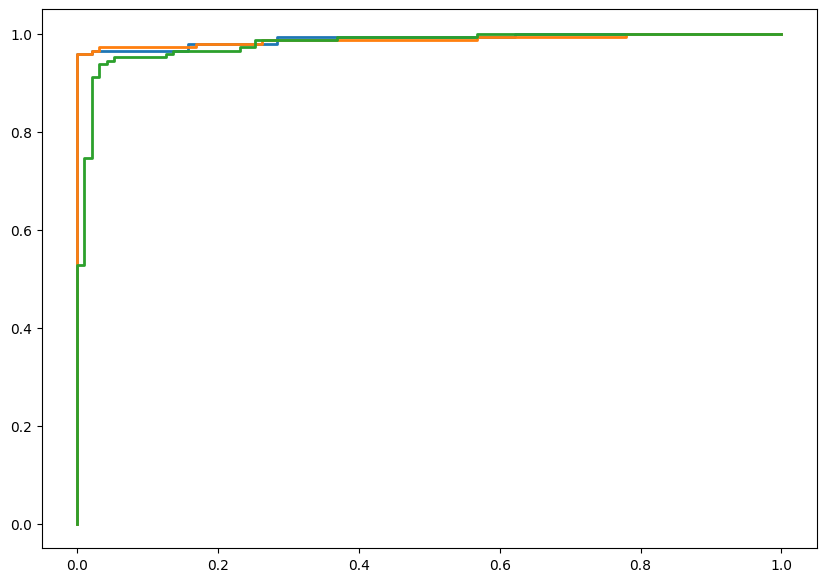

In [ ]:
plt.figure(figsize=(10, 7))

for name, model in models:
    # Predict probabilities (class 1)
    y_proba = model.predict_proba(x_test)[:, 1]

    # Compute ROC and AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot each ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Add chance diagonal
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Chance (AUC = 0.50)')

# Plot formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison Across Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
